In [1]:
from __future__ import division 
import matplotlib.pyplot as plt
%matplotlib inline
import time
import emotion_analysis
emo = emotion_analysis.EmotionAnalysis()

In [2]:
inp, lab = emo.prepare_dataset_per_frame('data')

Read audio file 'data\neutral_127.wav', count: 100


In [3]:
from collections import Counter
Counter(lab)

Counter({'negative': 57119, 'neutral': 64637, 'positive': 72480})

In [4]:
#from random import shuffle
import numpy as np
#dataset = zip(inp, lab)
#shuffle(dataset)
#inp, lab = zip(*dataset)
max_value = max([max(i) for i in inp])
min_value = min([min(i) for i in inp])

#inp = inp[:100000]
#lab = lab[:100000]

#normalised_inp = np.asarray(inp)/max_value
inp = (np.asarray(inp)-min_value)/(max_value-min_value)

In [5]:
# Random Forest : Better performance
s = time.time()
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(inp[0:int(len(inp)*3/float(4))],lab[0:int(len(inp)*3/float(4))])
#clf = clf.fit(inp, lab)
e = time.time()
print "Time taken: "+str(e-s)+" s."

Time taken: 253.596000195 s.


In [6]:
# SVM with RBF : Worst performance

#from sklearn import svm
#clf = svm.SVC(kernel = 'rbf')
#clf = clf.fit(inp[0:int(len(inp)*3/float(4))],lab[0:int(len(inp)*3/float(4))])
#clf = clf.fit(inp, lab)

In [7]:
s = time.time()
y_pred_train = [clf.predict([point]) for point in inp[0:int(len(inp)*3/float(4))]]
y_actual_train = [output for output in lab[0:int(len(inp)*3/float(4))]]
e = time.time()
print "Time taken: "+str(e-s)+" s."

Time taken: 883.972000122 s.


In [8]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, _ = precision_recall_fscore_support(y_actual_train, y_pred_train, labels=['neutral','positive','negative'])
print "Precision = "+str(precision)+"\nRecall = "+str(recall)+"\nF1 Score = "+str(f1_score)

Precision = [ 0.99997829  1.          1.        ]
Recall = [ 1.        0.999984  1.      ]
F1 Score = [ 0.99998915  0.999992    1.        ]


In [10]:
s = time.time()
y_pred_test = [clf.predict([point]) for point in inp[int(len(inp)*3/float(4)):]]
y_actual_test =[output for output in lab[int(len(inp)*3/float(4)):]]
e = time.time()
print "Time taken: "+str(e-s)+" s."

Time taken: 335.055000067 s.


In [11]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, _ = precision_recall_fscore_support(y_actual_test, y_pred_test, labels=['neutral','positive','negative'])
print "Precision = "+str(precision)+"\nRecall = "+str(recall)+"\nF1 Score = "+str(f1_score)

Precision = [ 0.44381919  0.2606487   0.51188257]
Recall = [ 0.25901798  0.75977989  0.2198099 ]
F1 Score = [ 0.32712314  0.38814209  0.30755232]


In [12]:
lab_to_int = {'neutral':0, 'positive':1, 'negative':2}
int_to_lab = {0:'neutral', 1:'positive', 2:'negative'}

In [13]:
import feature_extractor
import scipy.io.wavfile as wav
import math

extractor = feature_extractor.FeatureExtractor()

def final_result(audio_signal):
    all_result = []
    for frame_feature in extractor.extract_features_per_frame(audio_signal = audio_signal):
        frame_feature = (np.asarray(frame_feature)-min_value)/(max_value-min_value)
        frame_result = clf.predict([frame_feature])
        all_result.append(frame_result[0])
    label_counts = Counter(all_result)
    return max(label_counts, key = label_counts.get)

In [14]:
s = time.time()
from os import listdir
from os.path import isfile, join
import scipy.io.wavfile as wav
from random import shuffle

path = 'data'

y_pred=[]
y_actual=[]

audio_files = [f for f in listdir(path) if isfile(join(path, f))]
shuffle(audio_files)
count = 0
for audio_file in audio_files:
    count+=1
    print "Counter: "+str(count)
    y_pred.append(final_result(audio_signal = wav.read(join(path, audio_file))))
    y_actual.append(audio_file.split('_')[0])
e = time.time()
print "Time taken: "+str(e-s)+" s."

Counter: 1
Counter: 2
Counter: 3
Counter: 4
Counter: 5
Counter: 6
Counter: 7
Counter: 8
Counter: 9
Counter: 10
Counter: 11
Counter: 12
Counter: 13
Counter: 14
Counter: 15
Counter: 16
Counter: 17
Counter: 18
Counter: 19
Counter: 20
Counter: 21
Counter: 22
Counter: 23
Counter: 24
Counter: 25
Counter: 26
Counter: 27
Counter: 28
Counter: 29
Counter: 30
Counter: 31
Counter: 32
Counter: 33
Counter: 34
Counter: 35
Counter: 36
Counter: 37
Counter: 38
Counter: 39
Counter: 40
Counter: 41
Counter: 42
Counter: 43
Counter: 44
Counter: 45
Counter: 46
Counter: 47
Counter: 48
Counter: 49
Counter: 50
Counter: 51
Counter: 52
Counter: 53
Counter: 54
Counter: 55
Counter: 56
Counter: 57
Counter: 58
Counter: 59
Counter: 60
Counter: 61
Counter: 62
Counter: 63
Counter: 64
Counter: 65
Counter: 66
Counter: 67
Counter: 68
Counter: 69
Counter: 70
Counter: 71
Counter: 72
Counter: 73
Counter: 74
Counter: 75
Counter: 76
Counter: 77
Counter: 78
Counter: 79
Counter: 80
Counter: 81
Counter: 82
Counter: 83
Counter: 84
C

In [15]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, _ = precision_recall_fscore_support(y_actual, y_pred, labels=['neutral','positive','negative'])
print "Precision = "+str(precision)+"\nRecall = "+str(recall)+"\nF1 Score = "+str(f1_score)

Precision = [ 0.78181818  0.42553191  0.91428571]
Recall = [ 0.24712644  0.97297297  0.20779221]
F1 Score = [ 0.37554585  0.59210526  0.33862434]


Enter the name of the call file name.
> negative_1.wav


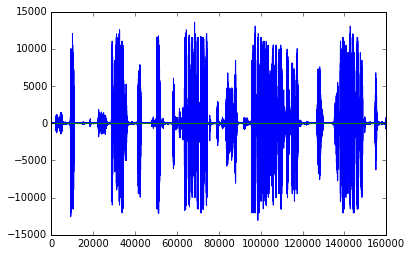

In [16]:
file_name = raw_input("Enter the name of the call file name.\n> ")
rate_sig, sig = wav.read(file_name)

plt.plot(sig)
plt.plot((0,len(sig)),(0,0),'g')
plt.show()

complete_call_result = final_result(audio_signal = (rate_sig, sig))
first_half_result = final_result(audio_signal = (rate_sig, sig[:int(len(sig)/2)]))
second_half_result = final_result(audio_signal = (rate_sig, sig[int(len(sig)/2):]))
segment_result = []
for i in range(int(math.ceil(len(sig)/(rate_sig*20)))):
    segment_result.append(final_result(audio_signal = (rate_sig, sig[i*rate_sig*20:i*rate_sig*20+rate_sig*20])))

Overall call result: positive
Trainsition: positive --> positive


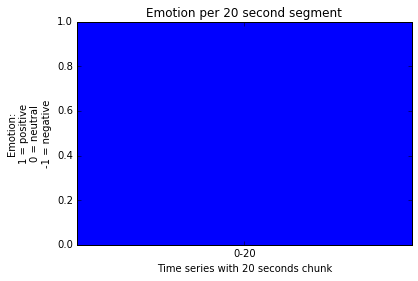

In [17]:
# import numpy as np
from __future__ import division
print "Overall call result: "+complete_call_result
print "Trainsition: "+first_half_result+" --> "+second_half_result
map_dict = {'negative':-1, 'neutral':0, 'positive':1}
mapped_segment_result = [map_dict[result] for result in segment_result]
index = [i for i in range(len(mapped_segment_result))]
index = np.asarray(index)
bar_width = 1
plt.plot((0,index[-1]+1),((0,0)), 'r')
plt.bar(index, mapped_segment_result, bar_width)
plt.xticks(index + bar_width/2 , (str(i*20)+'-'+str((i+1)*20) for i in index))
plt.xlabel('Time series with 20 seconds chunk')
#plt.axes([0, 100, -2, 2])
plt.ylabel('Emotion:\n1 = positive\n0 = neutral\n-1 = negative')
plt.title('Emotion per 20 second segment')
plt.show()

In [18]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(cm))
    plt.xticks(tick_marks, ['neutral','positive','negative'], rotation=45)
    plt.yticks(tick_marks, ['neutral','positive','negative'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual, y_pred, labels=['neutral','positive','negative'])
print cm
plot_confusion_matrix(cm)

In [ ]:
len([1 for i in range(len(y_pred)) if y_pred[i]==y_actual[i]])/float(len(y_pred))

In [ ]:
lab[1] 